In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

In [2]:
from glob import glob
file_list=glob("D:/jupyter notebook/10 samples/*.wav")
for i,file in enumerate(file_list):
    print(f'{i}:{file}')

0:D:/jupyter notebook/10 samples\sample01.wav
1:D:/jupyter notebook/10 samples\sample02.wav
2:D:/jupyter notebook/10 samples\sample03.wav
3:D:/jupyter notebook/10 samples\sample04.wav
4:D:/jupyter notebook/10 samples\sample05.wav
5:D:/jupyter notebook/10 samples\sample06.wav
6:D:/jupyter notebook/10 samples\sample07.wav
7:D:/jupyter notebook/10 samples\sample08.wav
8:D:/jupyter notebook/10 samples\sample09.wav
9:D:/jupyter notebook/10 samples\sample10.wav


In [3]:
import IPython.display as ipd
ipd.Audio(file_list[0])

In [4]:
fox, sr = librosa.load(file_list[0], sr=None)
s, sr = librosa.load(file_list[1], sr=None)
p, sr = librosa.load(file_list[2], sr=None)

In [5]:
from librosa.util import normalize
fox=normalize(fox)
s=normalize(s)
p=normalize(p)

In [6]:
fox.size

240000

In [7]:
sample_duration=1/sr
print(f"duration of 1 sample is : {sample_duration:.6f} seconds")

duration of 1 sample is : 0.000021 seconds


In [8]:
duration_of_signal=sample_duration*240000
print(f"duration of whole signal is : {duration_of_signal:.2f} seconds")

duration of whole signal is : 5.00 seconds


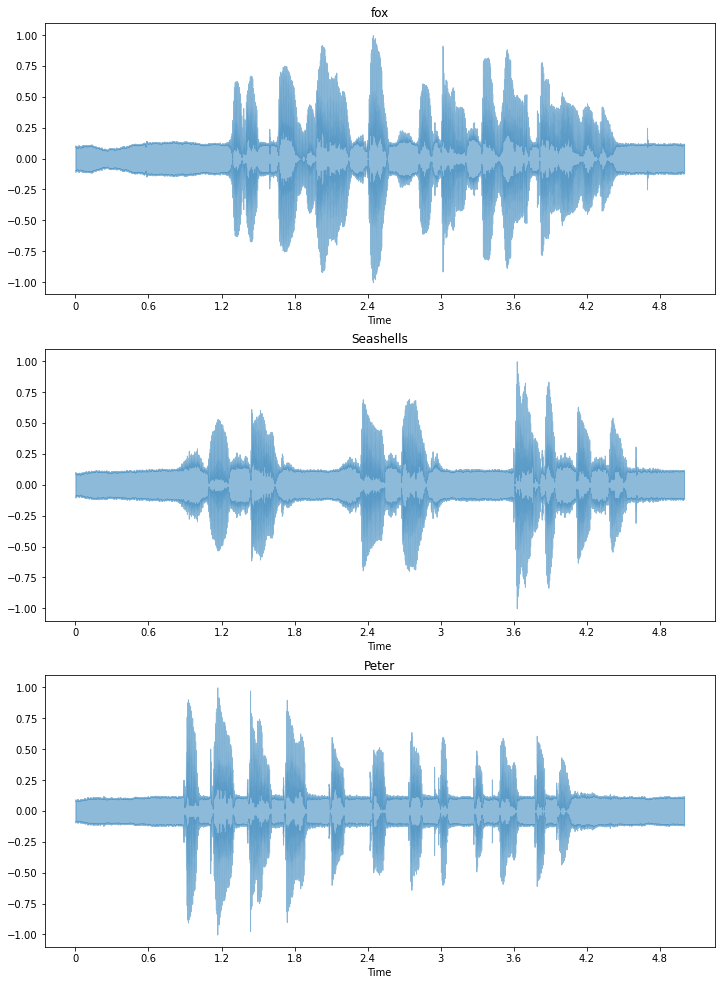

In [9]:
plt.figure(figsize=(12,17))

plt.subplot(3,1,1)
librosa.display.waveshow(fox,sr=sr,alpha=.5)
plt.title("fox")
#plt.ylim((-1,1))


plt.subplot(3,1,2)
librosa.display.waveshow(s,sr=sr,alpha=.5)
plt.title("Seashells")
#plt.ylim((-1,1))

plt.subplot(3,1,3)
librosa.display.waveshow(p,sr=sr,alpha=.5)
plt.title("Peter")
#plt.ylim((-1,1))
plt.show()

In [13]:
FRAME_LENGTH=1024
HOP_LENGTH=512
rms_fox = librosa.feature.rms(y=fox, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
rms_s = librosa.feature.rms(y=s, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
rms_p = librosa.feature.rms(y=p, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

In [14]:
rms_p.shape

(469,)

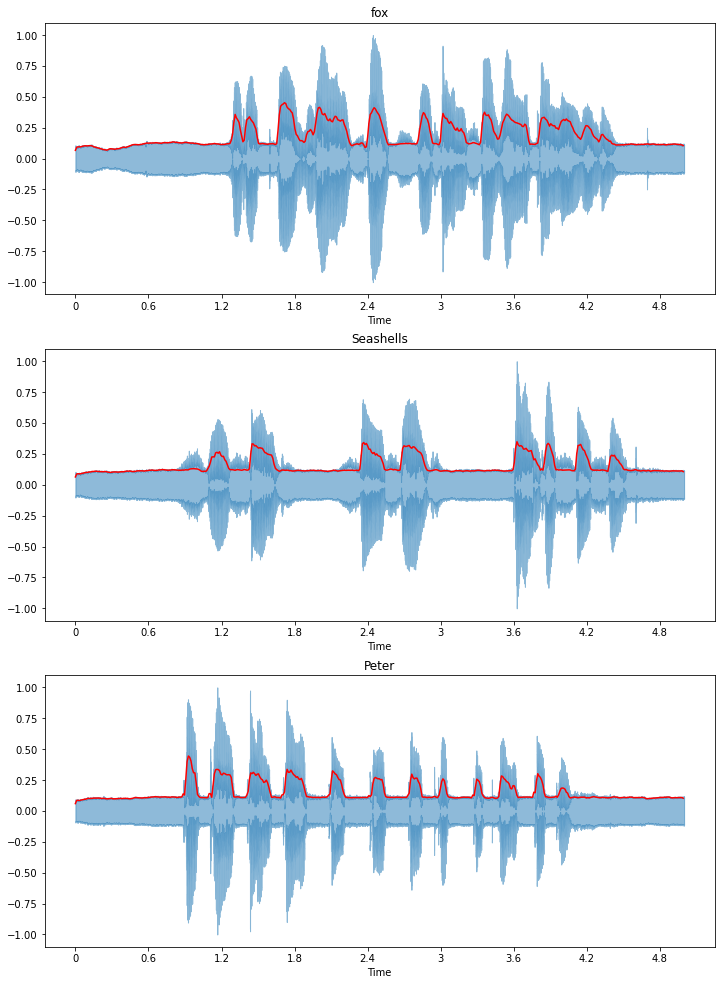

In [15]:
frames=range(0,rms_p.size)
t = librosa.frames_to_time(frames, sr=sr, hop_length=HOP_LENGTH)
plt.figure(figsize=(12,17))

plt.subplot(3,1,1)
librosa.display.waveshow(fox,sr=sr,alpha=.5)
plt.plot(t,rms_fox,color='r')
plt.title("fox")
#plt.ylim((-1,1))


plt.subplot(3,1,2)
librosa.display.waveshow(s,sr=sr,alpha=.5)
plt.plot(t,rms_s,color='r')
plt.title("Seashells")
#plt.ylim((-1,1))

plt.subplot(3,1,3)
librosa.display.waveshow(p,sr=sr,alpha=.5)
plt.plot(t,rms_p,color='r')
plt.title("Peter")
#plt.ylim((-1,1))
plt.show()

In [17]:
def rms(signal,frame_length,hop_length):
    rms=[]
    for i in range (0,len(signal),hop_length):
        rms_current_frame=np.sqrt(np.sum(signal[i:i+frame_length]**2)/frame_length)
        rms.append(rms_current_frame)
    return np.array(rms)

In [19]:
rms1_fox =rms(fox, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
rms1_s = rms(s, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
rms1_p = rms(p, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)

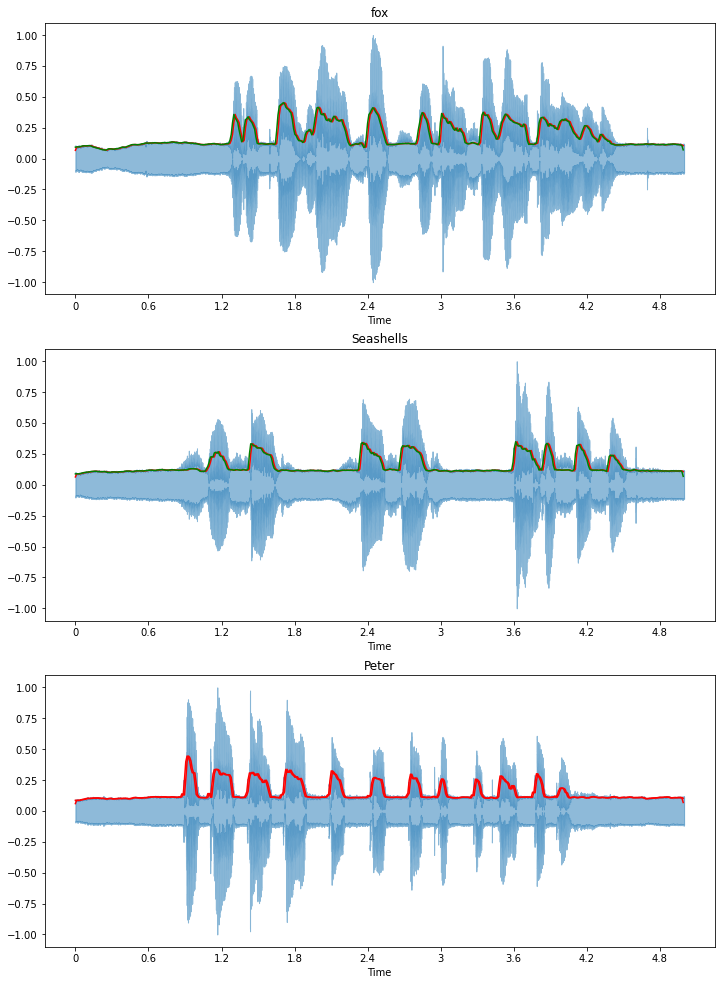

In [20]:
plt.figure(figsize=(12,17))

plt.subplot(3,1,1)
librosa.display.waveshow(fox,sr=sr,alpha=.5)
plt.plot(t,rms_fox,color='r')
plt.plot(t,rms1_fox,color='g')
plt.title("fox")
#plt.ylim((-1,1))


plt.subplot(3,1,2)
librosa.display.waveshow(s,sr=sr,alpha=.5)
plt.plot(t,rms_s,color='r')
plt.plot(t,rms1_s,color='g')
plt.title("Seashells")
#plt.ylim((-1,1))

plt.subplot(3,1,3)
librosa.display.waveshow(p,sr=sr,alpha=.5)
plt.plot(t,rms_p,color='r')
plt.plot(t,rms1_p,color='r')
plt.title("Peter")
#plt.ylim((-1,1))
plt.show()

In [21]:
zcr_fox = librosa.feature.zero_crossing_rate(y=fox, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
zcr_s = librosa.feature.zero_crossing_rate(y=s, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
zcr_p = librosa.feature.zero_crossing_rate(y=p, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

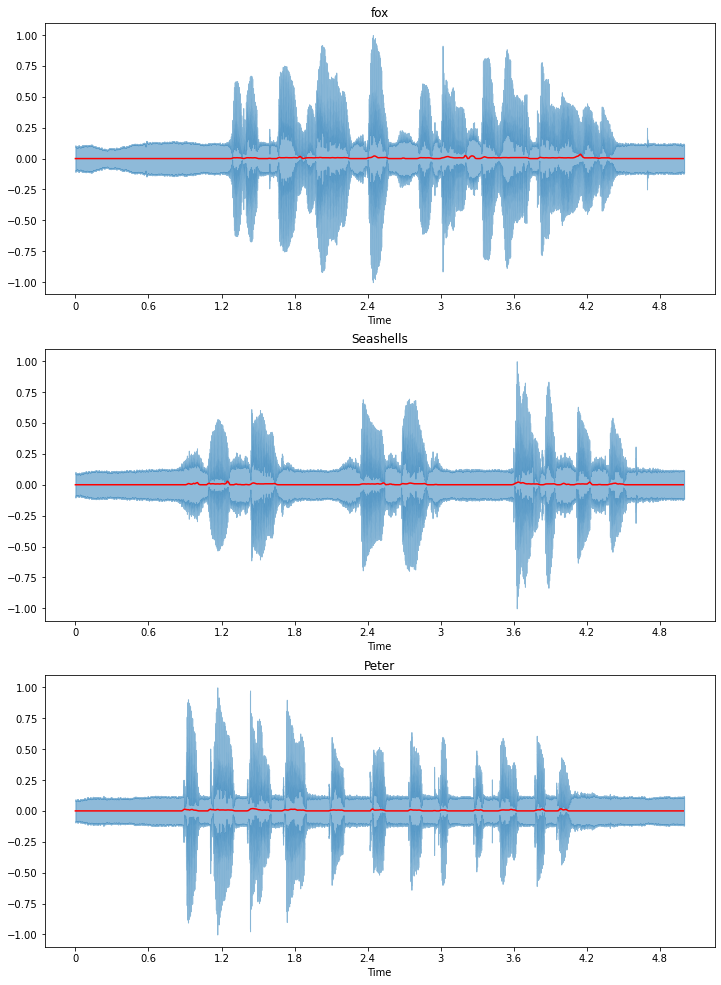

In [22]:
plt.figure(figsize=(12,17))

plt.subplot(3,1,1)
librosa.display.waveshow(fox,sr=sr,alpha=.5)
plt.plot(t,zcr_fox,color='r')
plt.title("fox")
#plt.ylim((-1,1))


plt.subplot(3,1,2)
librosa.display.waveshow(s,sr=sr,alpha=.5)
plt.plot(t,zcr_s,color='r')
plt.title("Seashells")
#plt.ylim((-1,1))

plt.subplot(3,1,3)
librosa.display.waveshow(p,sr=sr,alpha=.5)
plt.plot(t,zcr_p,color='r')
plt.title("Peter")
#plt.ylim((-1,1))
plt.show()

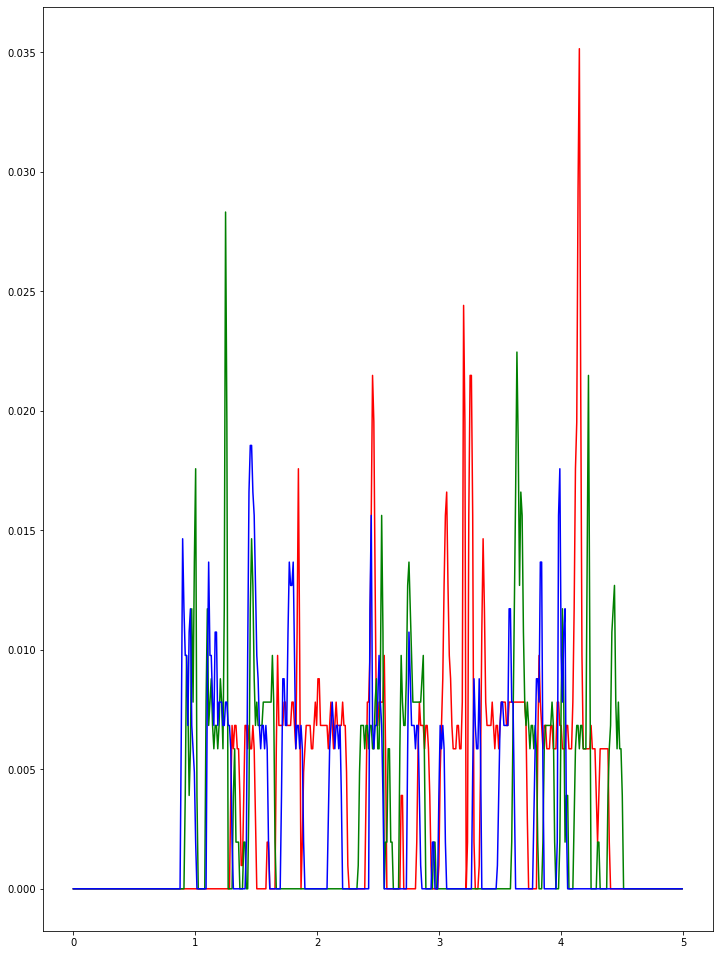

In [26]:
plt.figure(figsize=(12,17))
plt.plot(t,zcr_fox,color='r')
plt.plot(t,zcr_s,color='g')
plt.plot(t,zcr_p,color='b')
plt.show()

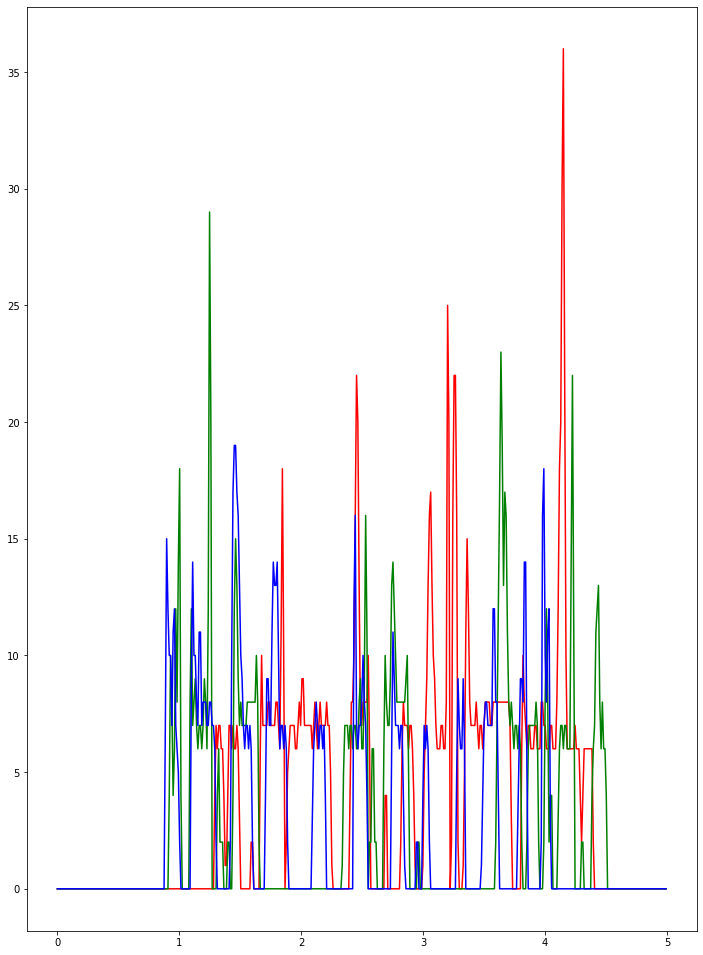

In [27]:
plt.figure(figsize=(12,17))
plt.plot(t,zcr_fox*FRAME_LENGTH,color='r')
plt.plot(t,zcr_s*FRAME_LENGTH,color='g')
plt.plot(t,zcr_p*FRAME_LENGTH,color='b')
plt.show()